<a id='contents'></a>
# Histogram Demo

- [Example 1: A default histogram plot](#ex1)
- [Example 2. Histogram with fixed number of bins](#ex2)
- [Example 3. Histogram with dynamic number of bins](#ex3)
- [Example 4. Plot the similar histogram with Seaborn's distplot()](#ex4)
- [Example 5. Plot two histograms side-by-side](#ex5)
- [Example 6: Compare Different Bin Size](#ex6)
- [Example 7: An example describing the ambiguity](#ex7)

In [2]:
# import matplotlib as mpl
# mpl.rcParams['font.sans-serif'] = ['Arial']

<a id='ex1'></a>
## Example 1: A default histogram plot

In [1]:
pokemon = pd.read_csv('data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

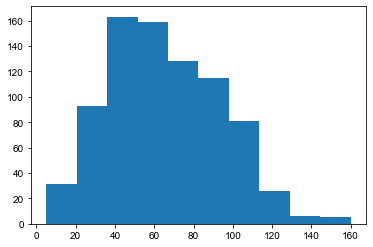

In [4]:
# The return of `plt.hist()` is counts ,bins, and patches
plt.hist(data = pokemon, x = 'speed')


[BACK](#contents)

<a id='ex2'></a>
## Example 2. Histogram with fixed number of bins

In [5]:
pokemon.speed.describe()

count    807.000000
mean      65.830235
std       27.736838
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64

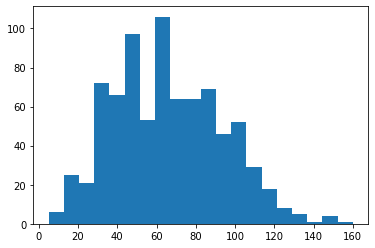

In [2]:
# Specify number of bins
plt.hist(data = pokemon, x = 'speed', bins = 20);

[BACK](#contents)

<a id='ex3'></a>
## Example 3. Histogram with dynamic number of bins

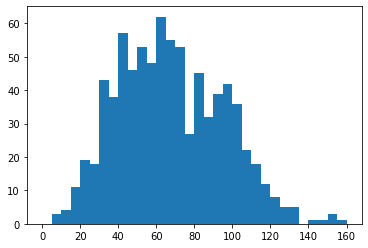

In [3]:
# Create bins with width 5
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

[BACK](#contents)

<a id='ex4'></a>
## Example 4. Plot the similar histogram with Seaborn's `displot()`

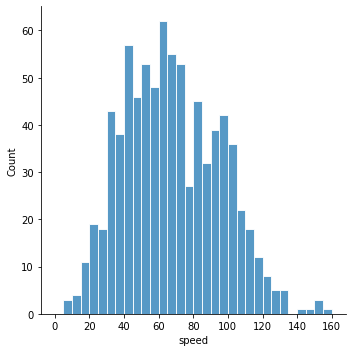

In [4]:
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)

sns.displot(pokemon.speed, bins=bin_edges, edgecolor='white');

[BACK](#contents)

<a id='ex5'></a>
## Example 5. Plot two histograms side-by-side

To see the impact of different bin size may have on viz

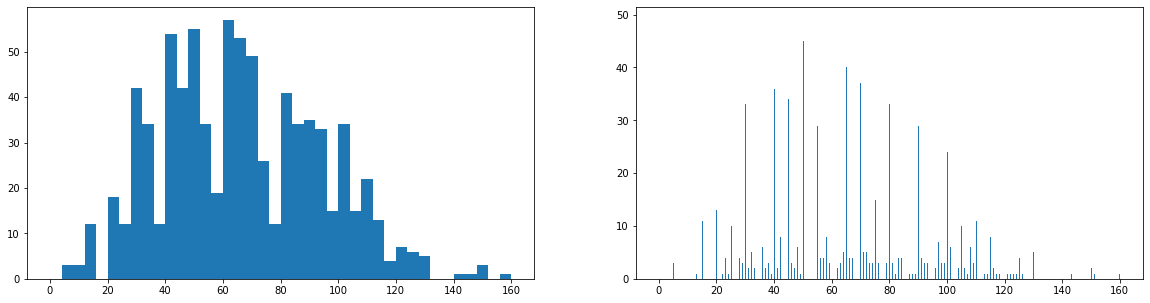

In [5]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

[BACK](#contents)

### Figures, Axes, Subplot Fundamentals

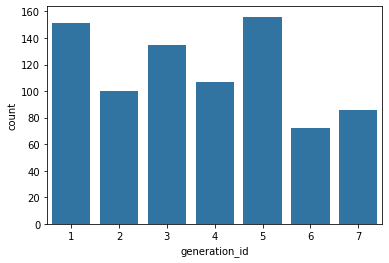

In [15]:
fig = plt.figure()

# first two elements of the list indicate the position of the lower-left hand corner of the Axes 
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sns.color_palette()[0]
sns.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax);

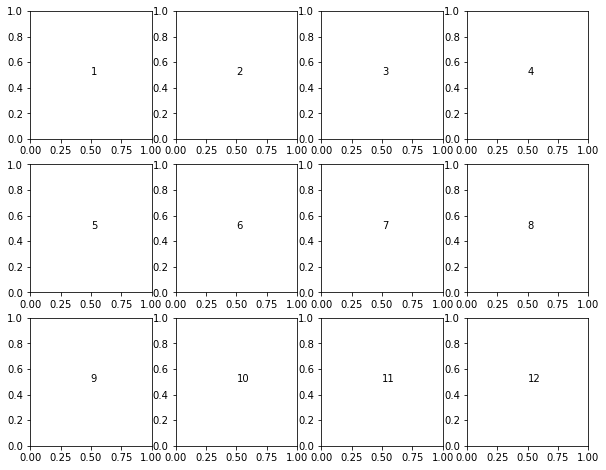

In [26]:
fig, axes = plt.subplots(3, 4, figsize=(10, 8)) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes
    
# plt.tight_layout()

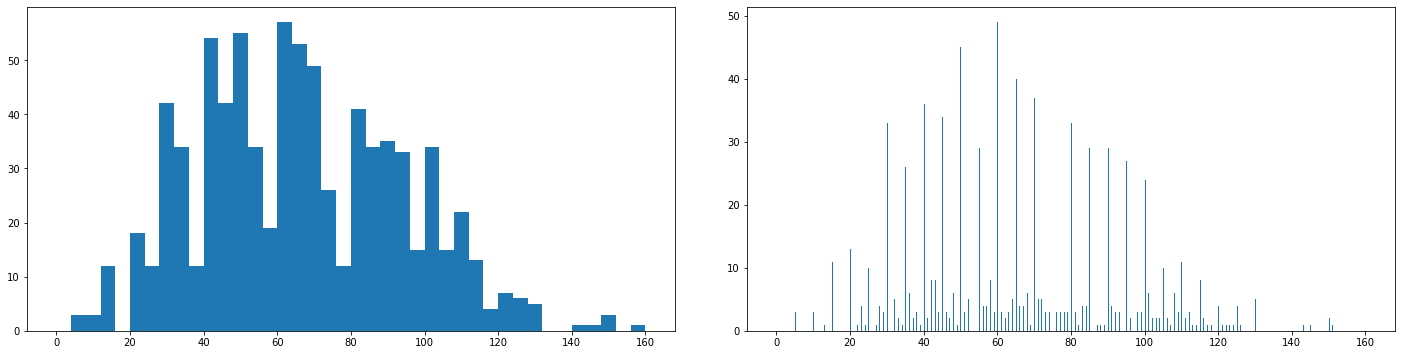

In [34]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
fig = plt.figure(figsize = [20, 10]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
ax1 = fig.add_axes([0, .125, .45, .45])
bins = np.arange(0, pokemon['speed'].max()+4, 4)
ax1.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
ax2 = fig.add_axes([.5, .125, .45, .45])
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
ax2.hist(data = pokemon, x = 'speed', bins = bins);

<a id='ex6'></a>
## Example 6: Compare Different Bin Size

**Create a histogram that depicts the distribution of `special-defense` values taken.**

In [10]:
pokemon = pd.read_csv('pokemon.csv')

In [11]:
pokemon['special-defense'].describe()

count    807.000000
mean      70.013631
std       27.292344
min       20.000000
25%       50.000000
50%       65.000000
75%       85.000000
max      230.000000
Name: special-defense, dtype: float64

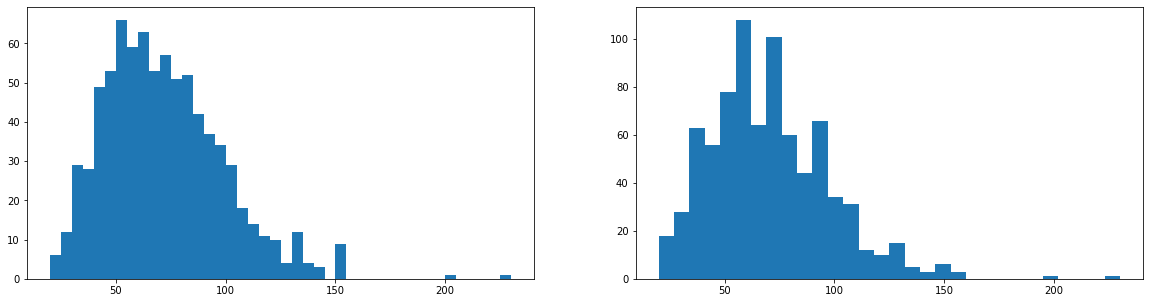

In [6]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1,2,1)
# bin size = 5
bins = np.arange(20, pokemon['special-defense'].max()+5, 5)
plt.hist(pokemon['special-defense'], bins = bins)


plt.subplot(1,2,2)
# bin size = 7
bins = np.arange(20, pokemon['special-defense'].max()+7, 7)
plt.hist(pokemon['special-defense'], bins = bins);

[BACK](#contents)

<a id='ex7'></a>
## Example 7: An example describing the ambiguity

<br>

**About the data:**

A fair dice has six-faces having numbers `[1-6]`. 

There are 100 dices, and two trials were conducted.

In each trial, all 100 dices were rolled down, and the outcome `[1-6]` was recorded.

The `Sum` column represents the sum of the outcomes in the two trials, for each given dice. 

In [35]:
die_rolls = pd.read_csv('data/die-rolls.csv')

die_rolls.head(10)

,Dice,Trial 1,Trial 2,Sum
0,1,4,1,5
1,2,4,5,9
2,3,2,6,8
3,4,6,3,9
4,5,3,6,9
5,6,6,6,12
6,7,3,3,6
7,8,3,2,5
8,9,2,6,8
9,10,6,6,12


___Step 1:___ **By shifting the edges of the bars can remove ambiguity in the case of Discrete data.**<font color='red'>(The Right is Better, but there is still ambiguity as the `sum` is discret number.)</font>

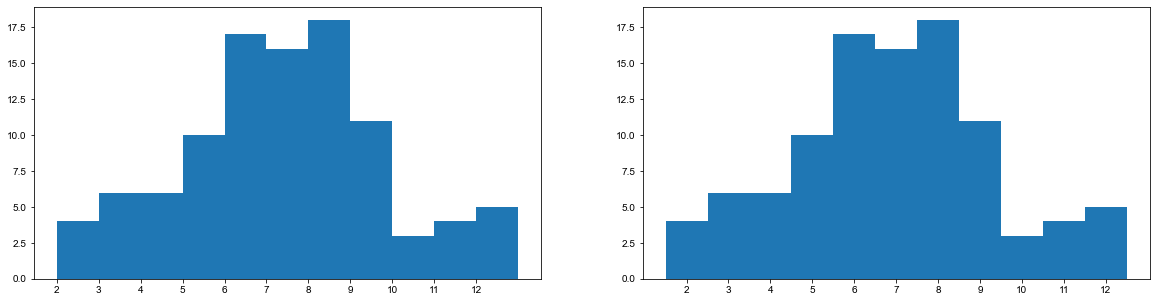

In [14]:
plt.figure(figsize = [20, 5])

# Histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(data=die_rolls, x='Sum', bins = bin_edges, edgecolor='white');
plt.xticks(np.arange(2, 12+1, 1));


# Histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=die_rolls, x='Sum', bins = bin_edges, edgecolor='white');
plt.xticks(np.arange(2, 12+1, 1));

___Step 2:___ **Making gaps between individual bars**

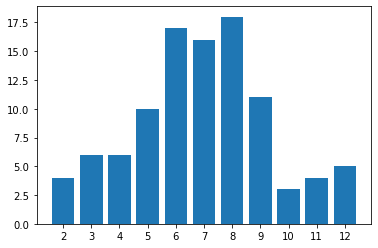

In [48]:
# 另外一种方法：通过直接调节align是刻度居中
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(data=die_rolls, 
         x='Sum', 
         bins = bin_edges, 
         align='left', # 使柱体位于箱体‘左边界’刻度上（默认是位于箱体的下界和上界之间）
         rwidth=.8)  # 增加柱体间断，以表示离散变量
plt.xticks(range(2, 13, 1));

[BACK](#contents)

<a id='ex8'></a>
## Example 8: Limit the Axis Range

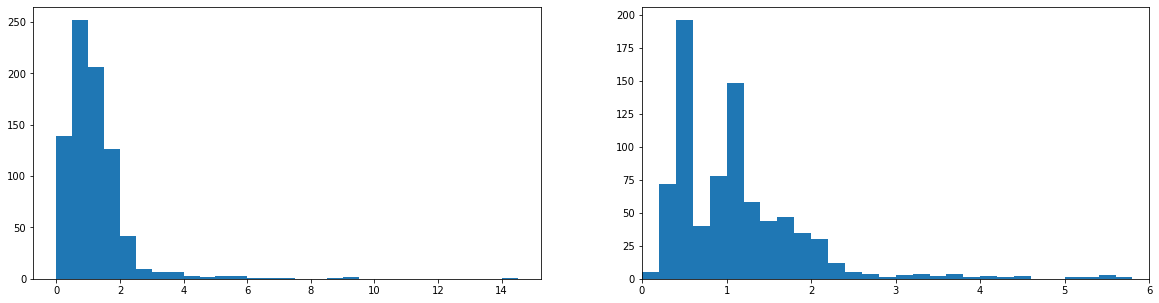

In [50]:
# Define the figure size
plt.figure(figsize = [20, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins = bin_edges, edgecolor='white')

# histogram on right: focus in on bulk of data < 6
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins = bin_edges, edgecolor='white')
plt.xlim(0, 6); # could also be called as plt.xlim((0, 6))



### Scale the `height` data distribution at base 10

In [75]:
pokemon['height'].describe()

count    807.000000
mean       1.162454
std        1.081030
min        0.100000
25%        0.600000
50%        1.000000
75%        1.500000
max       14.500000
Name: height, dtype: float64

In [79]:
pokemon_height = pokemon['height']

(array([641., 134.,  17.,   8.,   3.,   0.,   3.,   0.,   0.,   1.]),
 array([ 0.1 ,  1.54,  2.98,  4.42,  5.86,  7.3 ,  8.74, 10.18, 11.62,
        13.06, 14.5 ]),
 <BarContainer object of 10 artists>)

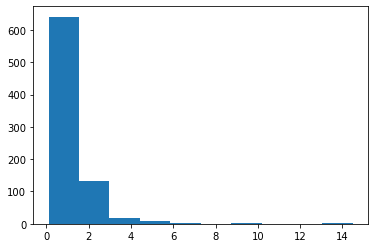

In [81]:
plt.hist(pokemon_height)

(array([641., 134.,  17.,   8.,   3.,   0.,   3.,   0.,   0.,   1.]),
 array([ 0.1 ,  1.54,  2.98,  4.42,  5.86,  7.3 ,  8.74, 10.18, 11.62,
        13.06, 14.5 ]),
 <BarContainer object of 10 artists>)

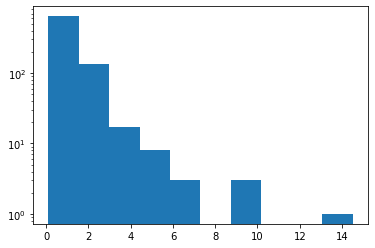

In [82]:
plt.hist(pokemon_height, log=True)

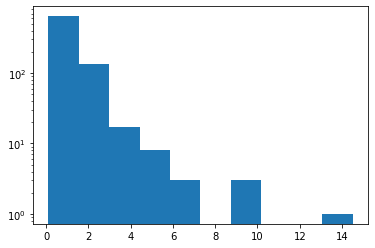

In [83]:
# 其实使用plt.hist()中的log效果等同plt.yscale('log')，如上图
plt.hist(pokemon_height)
plt.yscale('log')

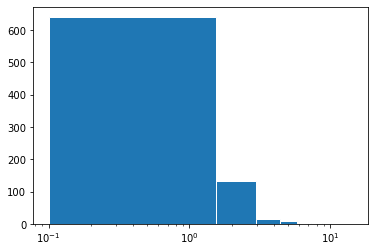

In [110]:
# 用plt.scale('log')，由于bin_interval此时仍然是线性
plt.hist(pokemon_height, edgecolor='white')
plt.xscale('log')

In [88]:
# 查看对数化后的值域
np.log10(pokemon_height).describe()

count    807.000000
mean      -0.046775
std        0.306961
min       -1.000000
25%       -0.221849
50%        0.000000
75%        0.176091
max        1.161368
Name: height, dtype: float64

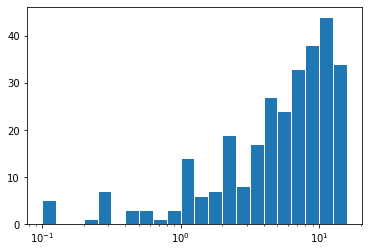

In [104]:
# 重新构造bin_interval，使之与xscale后的x轴匹配，即将interval指数化
bins = 10**np.arange(-1, np.log10(pokemon['height'].max())+.1, .1)
plt.hist(pokemon_weight, bins=bins, edgecolor='white')
plt.xscale('log');

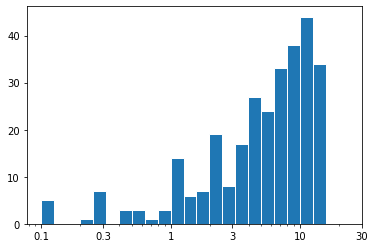

In [108]:
# 为了增强可读性，重新映射x轴刻度值
bins = 10**np.arange(-1, np.log10(pokemon['height'].max())+.1, .1)
plt.hist(pokemon_weight, bins=bins, edgecolor='white')
plt.xscale('log')

new_ticks = [.1, .3, 1, 3, 10, 30]
plt.xticks(new_ticks, new_ticks);

<a id='ex9a'></a>
## Example 9a: Scales and Transformations

**Applicable Scenario: Values are distributed across a wide range.**


以10为底的对数化并非唯一选择，根据实际数据的情况，可以尝试其他数为底的缩放。

**Example 2: Scale the `weight` data distribution at base 2**

> **Step 1**: Recalculate the raw values in a new scale;

> **Step 2**: Construct the `bins` in the new scale;

> **Step 3**: Plot the histogram;

> **Step 4**: Adjust the ticks on the axis;

> **Step 5**: Transform the ticks back to the raw unit for interpretability purpose.

In [112]:
# Check the range of weight values
pokemon.weight.describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

(array([683.,  65.,  32.,  14.,   3.,   2.,   1.,   1.,   2.,   4.]),
 array([1.0000e-01, 1.0008e+02, 2.0006e+02, 3.0004e+02, 4.0002e+02,
        5.0000e+02, 5.9998e+02, 6.9996e+02, 7.9994e+02, 8.9992e+02,
        9.9990e+02]),
 <BarContainer object of 10 artists>)

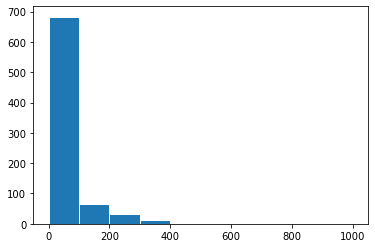

In [137]:
# Use the naive hist() function to get an understanding of 
# how the weight values are distributed without scaling.
plt.hist(data=pokemon, x='weight', edgecolor='white')

In [155]:
# Try to use the square-root scale to compress (transform) the values.
# But first take a look at how the value range changes after using square-root scaling
np.log2(pokemon.weight).describe()

count    807.000000
mean       4.532326
std        2.228908
min       -3.321928
25%        3.169925
50%        4.754888
75%        5.977280
max        9.965640
Name: weight, dtype: float64

(array([ 5.,  0.,  1.,  7.,  3.,  4., 10., 13., 18., 14., 30., 38., 52.,
        58., 52., 75., 93., 71., 70., 65., 41., 23., 33., 16.,  6.,  3.,
         6.]),
 array([9.47322854e-02, 1.33971683e-01, 1.89464571e-01, 2.67943366e-01,
        3.78929142e-01, 5.35886731e-01, 7.57858283e-01, 1.07177346e+00,
        1.51571657e+00, 2.14354693e+00, 3.03143313e+00, 4.28709385e+00,
        6.06286627e+00, 8.57418770e+00, 1.21257325e+01, 1.71483754e+01,
        2.42514651e+01, 3.42967508e+01, 4.85029301e+01, 6.85935016e+01,
        9.70058603e+01, 1.37187003e+02, 1.94011721e+02, 2.74374006e+02,
        3.88023441e+02, 5.48748013e+02, 7.76046882e+02, 1.09749603e+03]),
 <BarContainer object of 27 artists>)

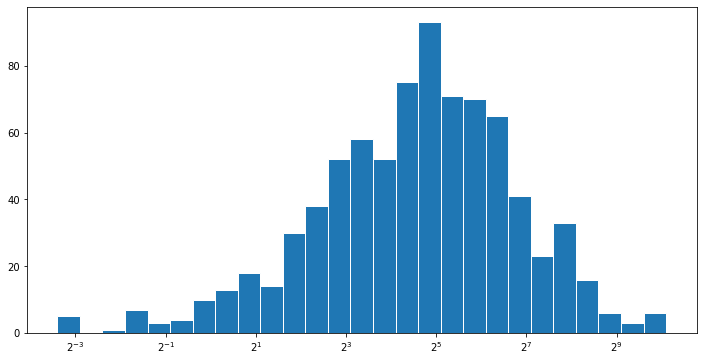

In [179]:
plt.figure(figsize=(12,6))
# 每个箱距并非相等，越往x轴右侧，箱距越大
bin_edges = 2**np.arange(-3.4, np.log2(pokemon['weight'].max()) + .5, .5)

plt.xscale('log', base=2)
plt.hist(pokemon.weight, bins=bin_edges, edgecolor='white')




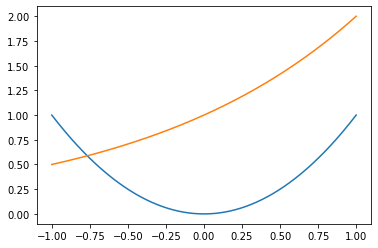

In [186]:
x_rng = np.linspace(-1, 1, 1000)

x_2 = [i**2 for i in x_rng]

sq = [2**i for i in x_rng]

plt.plot(x_rng, x_2)
plt.plot(x_rng, sq);

**Example 3: Scale in Squares**

注意“平方变换”和上例中的“对数2为底的变换”是完全不同的两种变换

平方变换：
$
\sqrt{x} <--> x^2
$

2为底的对数变换：
$
log_2{x}  <--> 2^x
$

简单来说，两种都为可以进行缩放的方法，但是对于x轴上的映射计算完全不同。

**Step 1 & 2: Transform the raw values and the bins on the new scale (Square-root).**

In [181]:
pokemon.weight.describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [182]:
np.sqrt(pokemon.weight).describe()

count    807.000000
mean       6.278126
std        4.731173
min        0.316228
25%        3.000000
50%        5.196152
75%        7.937254
max       31.621195
Name: weight, dtype: float64

(array([ 23.,  71., 105.,  95.,  91.,  99.,  61.,  61.,  34.,  40.,  28.,
         15.,  13.,   8.,  19.,   8.,   6.,   6.,   9.,   1.,   3.,   1.,
          1.,   1.,   0.,   0.,   1.,   1.,   1.,   1.,   2.,   2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32.]),
 <BarContainer object of 32 artists>)

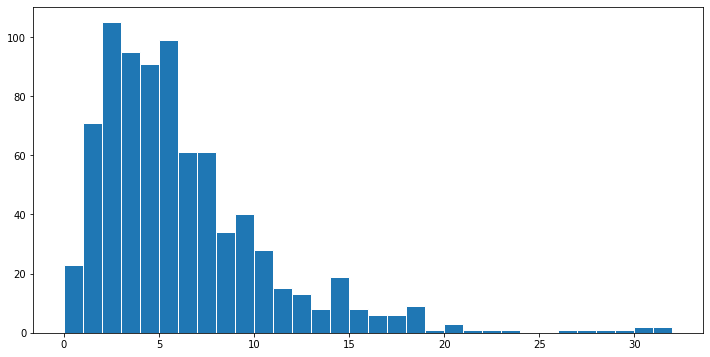

In [165]:
# With bin interval being 1
plt.figure(figsize=(12,6))

# 箱距仍然不等，之间的距离是n^2 - (n-1)^2，即非线性
# 每个箱界代表实际数据的n^2
bin_edges = np.arange(0, np.sqrt(pokemon['weight'].max()) + 1, 1)

plt.hist(np.sqrt(pokemon.weight), bins=bin_edges, edgecolor='white')

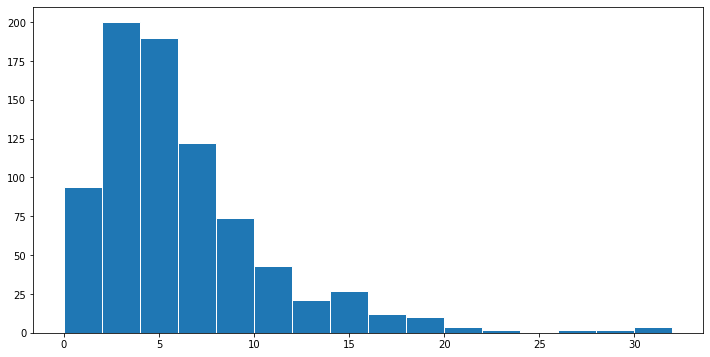

In [117]:
# With bin interval being 2
plt.figure(figsize=(12,6))

# 增大箱距
bin_edges = np.arange(0, np.sqrt(pokemon['weight'].max()) + 2, 2)

plt.hist(np.sqrt(pokemon.weight), bins=bin_edges, edgecolor='white');

**It seems bin interval being 1 is optimal.**

**Step 3 & 4: Transform the ticks back to the raw unit for interpretability.**

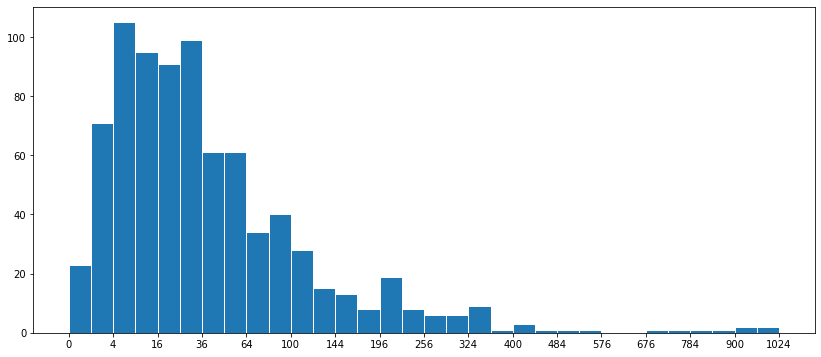

In [190]:
plt.figure(figsize=(14,6))

bin_edges = np.arange(0, np.sqrt(pokemon['weight'].max()) + 1, 1)

plt.hist(np.sqrt(pokemon.weight), bins=bin_edges, edgecolor='white')

# xticks has nothing to do with bins at all. It only control the representation on x axis.
ticks = bin_edges

# 还原成实际数据的范围
new_ticks = ["{}".format(int(i**2)) for i in ticks]

# 为了易读性，缩减刻度值显示数，否则需要使用rotation，但这样会降低可读性
plt.xticks(ticks[::2], new_ticks[::2]);

**It seems the ticks on the x axis is a little bit denser. So re-assign the tick intervals.**

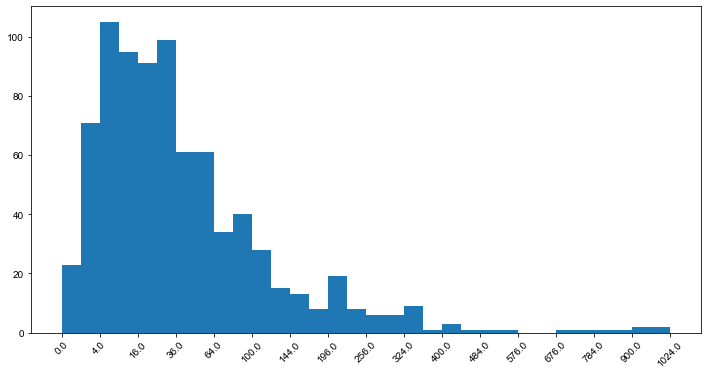

In [24]:
plt.figure(figsize=(12,6))

bin_edges = np.arange(0, np.sqrt(pokemon['weight'].max()) + 1, 1)

plt.hist(np.sqrt(pokemon.weight), bins=bin_edges)


# Assign the tick intervals to be 2 instead of 1.
ticks = np.arange(0, np.sqrt(pokemon['weight'].max()) + 2, 2)

plt.xticks(ticks, ticks **2, rotation=45);

**It would be better if the x ticks are presented as integers.**

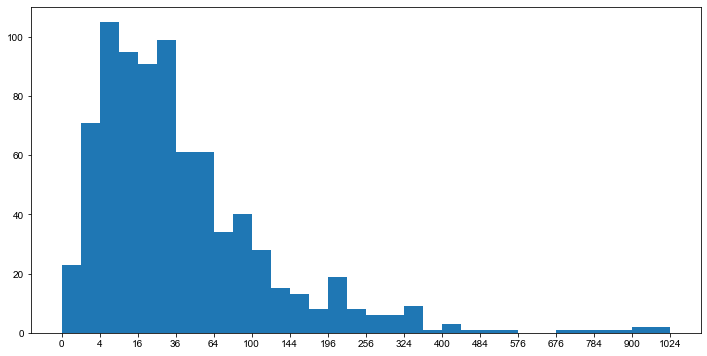

In [25]:
plt.figure(figsize=(12,6))

bin_edges = np.arange(0, np.sqrt(pokemon['weight'].max()) + 1, 1)

plt.hist(np.sqrt(pokemon.weight), bins=bin_edges)

ticks = np.arange(0, np.sqrt(pokemon['weight'].max()) + 2, 2)

plt.xticks(ticks, (ticks **2).astype(int));

**Of course we can assign any intervals if it's appropriate.**

___Interval value as 5:___

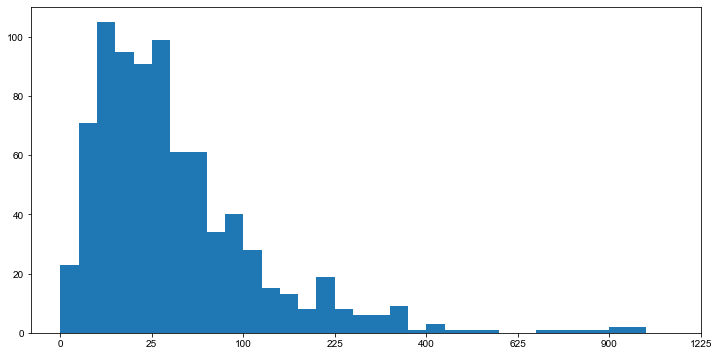

In [26]:
plt.figure(figsize=(12,6))

bin_edges = np.arange(0, np.sqrt(pokemon['weight'].max()) + 1, 1)

plt.hist(np.sqrt(pokemon.weight), bins=bin_edges)

ticks = np.arange(0, np.sqrt(pokemon['weight'].max()) + 5, 5)

plt.xticks(ticks, (ticks **2).astype(int));

___Interval value as 10:___

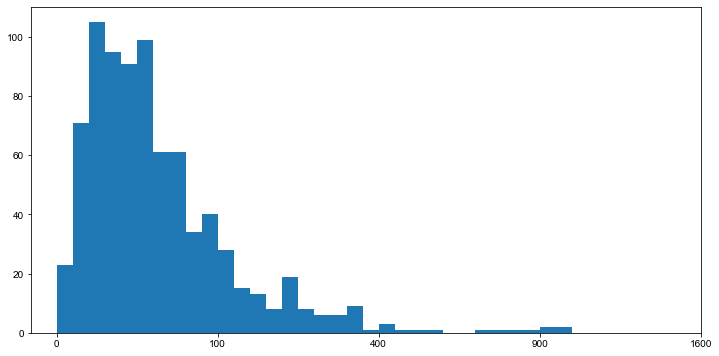

In [27]:
plt.figure(figsize=(12,6))

bin_edges = np.arange(0, np.sqrt(pokemon['weight'].max()) + 1, 1)

plt.hist(np.sqrt(pokemon.weight), bins=bin_edges)

ticks = np.arange(0, np.sqrt(pokemon['weight'].max()) + 10, 10)

plt.xticks(ticks, (ticks **2).astype(int));

**The following implements the same functionality as above except we use a helper function to hep us simplify the transform and transform-back process. ___(The `sqrt_transform.py` helper function can be found in the folder)___**

```python
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2
```

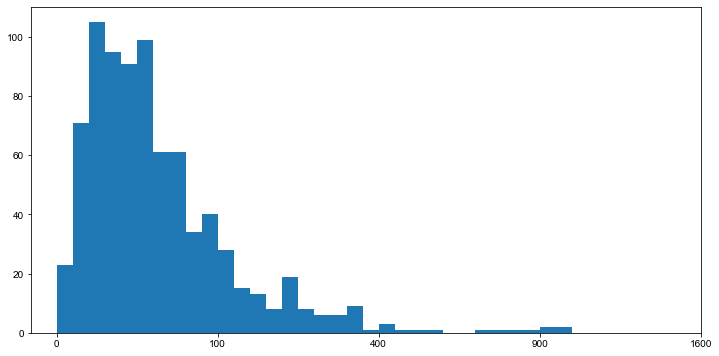

In [28]:
from sqrt_transform import sqrt_transform

plt.figure(figsize=(12, 6))

bin_interval = 1
xtick_interval = 10

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_transform(pokemon['weight'].max())+bin_interval, bin_interval)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_transform), bins = bin_edges)

# Transform the ticks of x axis
ticks = np.arange(0, sqrt_transform(pokemon['weight'].max())+xtick_interval, xtick_interval)

plt.xticks(ticks, sqrt_transform(ticks, inverse=True).astype(int));

<a id='ex9b'></a>
## Example 9b: Scales and Transformations

**Applicable Scenario: Values are distributed across a wide range.**

> **Step 1**: Recalculate the raw values in a new scale;

> **Step 2**: Construct the `bins` in the new scale;

> **Step 3**: Plot the histogram;

> **Step 4**: Adjust the ticks on the axis;

> **Step 5**: Transform the ticks back to the raw unit for interpretability purpose.

**Instead of using square root scaling, consider using `np.log2()` and `np.log10()` scaling to repeat the process above.**

<br>

<font color='red'>
<b>Here we use two different methods to achieve this.</b>

1. Define a function to scaling;
    
    
2. Use built-in `plt.xscale('log')` method;
    
</font>



In [29]:
pokemon.weight.describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [30]:
np.log10(pokemon.weight).describe()

count    807.000000
mean       1.364366
std        0.670968
min       -1.000000
25%        0.954243
50%        1.431364
75%        1.799341
max        2.999957
Name: weight, dtype: float64

In [31]:
def log2_transform(x, inverse=False):
    """ transformation helper function """
    if not inverse:
        return np.log2(x)
    else:
        return 2 ** x

def log10_transform(x, inverse=False):
    """ transformation helper function """
    if not inverse:
        return np.log10(x)
    else:
        return 10 ** x

**Method 1: Use self-defined scaling function.**

- 原始数据和箱距均需要进行相同的缩放

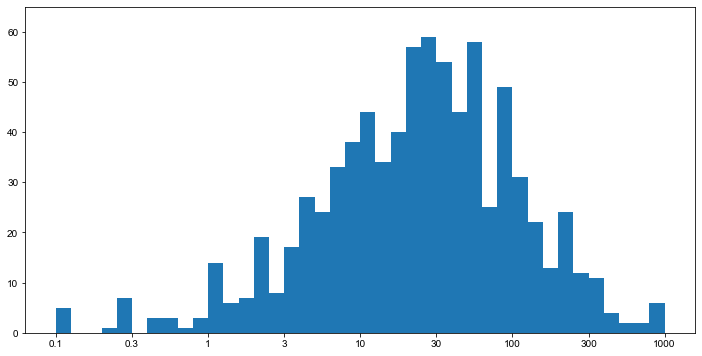

In [32]:
plt.figure(figsize=(12, 6))

bin_interval = .1

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(log10_transform(pokemon['weight'].min()), log10_transform(pokemon['weight'].max())+bin_interval, bin_interval)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(log10_transform), bins = bin_edges)

# Transform the ticks of x axis
ticks = np.arange(-1, 3+0.5, 0.5)
plt.xticks(ticks, [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000])

plt.ylim((0, 65));

**Method 2: Use built-in plt.xscale('log') method.**

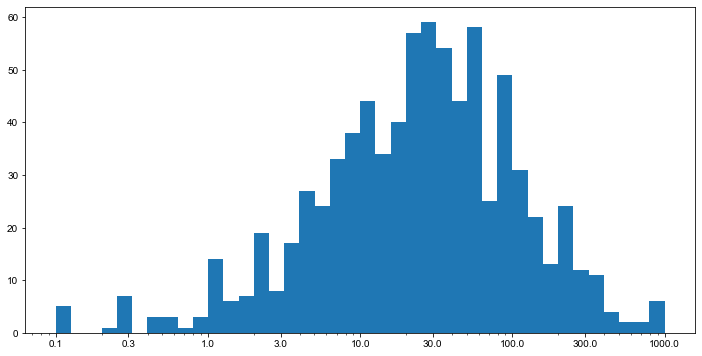

In [33]:
plt.figure(figsize=(12, 6))

# Bin resizing, to transform the x-axis    
bin_edges = 10 ** np.arange(-1, 3+0.1, 0.1)

# Plot the scaled data
plt.hist(pokemon.weight, bins = bin_edges)

# Transform the ticks of x axis. Must be ahead of the  xticks() function
plt.xscale('log')

ticks = np.array([.1, .3, 1, 3, 10, 30, 100, 300, 1000])

plt.xticks(ticks, ["{}".format(i) for i in ticks]);
